In [204]:
import PIL
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

import os

import pandas as pd
import copy

In [7]:
base_path = '../data/CelebAMask-HQ'

os.listdir(f'{base_path}')

['CelebAMask-HQ-pose-anno.txt',
 '.DS_Store',
 'README.txt',
 'CelebA-HQ-img',
 'CelebAMask-HQ-attribute-anno.txt',
 'CelebA-HQ-to-CelebA-mapping.txt',
 'CelebAMask-HQ-mask-anno']

In [84]:
attributes = pd.read_csv(f"{base_path}/CelebAMask-HQ-attribute-anno.txt", sep=" ", skiprows=[0])
attributes = attributes.reset_index()
attributes = attributes.drop('level_1', axis=1)

#No bangs or bald people
attributes = attributes[(attributes['Bald']!=1) & (attributes['Bangs']!=1)]

attributes

,level_0,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0.jpg,-1,1,1,1,-1,-1,1,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
1,1.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
2,2.jpg,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1
3,3.jpg,-1,-1,1,-1,-1,-1,-1,1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
4,4.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,1
5,5.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,1,-1,1,1,-1,1
6,6.jpg,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,1,-1,1
7,7.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,1,-1,1
8,8.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
9,9.jpg,1,-1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [66]:
image_file_names = attributes['level_0'].values

In [80]:
#0~1999
#2000~
file_to_folder = {}
prev=0
for i in range(15):
    
    
    cur_files = np.arange(prev,prev+2000)
    prev+=2000
    
    for file in cur_files:
        file_to_folder[file] = i


In [194]:
mask_path = f"{base_path}/CelebAMask-HQ-mask-anno"
orig_path = f"{base_path}/CelebA-HQ-img"

In [195]:
hair_postfix = 'hair'
other_postfix = ['skin', 'r_ear', 'l_ear', 'neck', 'cloth']

In [218]:
# orig = np.zeros((len(image_file_names), 96, 96,3), dtype=np.uint8)
# hair = np.zeros((len(image_file_names), 96, 96,3), dtype=np.uint8)
# face = np.zeros((len(image_file_names), 96, 96,3), dtype=np.uint8)
orig = []
hair = []
face = []


In [220]:
for count, file_name in enumerate(image_file_names):
    file_idx = file_name.split(".")[0]
    file_idx = int(file_idx)
    
    if os.path.isfile(f"{mask_path}/{file_to_folder[file_idx]}/{file_idx:05}_{hair_postfix}.png") :
    


        # Read orginal file
        cur_orig = PIL.Image.open(f"{orig_path}/{file_name}", mode='r').resize((96,96))
        cur_orig = np.array(cur_orig)



        # Mask hair
        temp_orig = copy.deepcopy(cur_orig)
        cur_hair_mask = PIL.Image.open(f"{mask_path}/{file_to_folder[file_idx]}/{file_idx:05}_{hair_postfix}.png", mode='r').resize((96,96))
        cur_hair_mask = np.array(cur_hair_mask)
        temp_orig[cur_hair_mask==0] = 255
        hair.append(temp_orig)


        # Mask face
        temp_orig = copy.deepcopy(cur_orig)
        face_masks = []
        for postfix in other_postfix:
            if os.path.isfile(f"{mask_path}/{file_to_folder[file_idx]}/{file_idx:05}_{postfix}.png") :
                mask = PIL.Image.open(f"{mask_path}/{file_to_folder[file_idx]}/{file_idx:05}_{postfix}.png", mode='r').resize((96,96))
                face_masks.append(np.array(mask))

        final_mask = np.zeros(temp_orig.shape)
        for mask in face_masks:
            final_mask = np.logical_or(final_mask,mask)
        temp_orig[final_mask==0] = 255

        face.append(temp_orig)


        mask_togeter = np.logical_or(cur_hair_mask, final_mask)
        cur_orig[mask_togeter==0] = 255
        orig.append(cur_orig)
        



        if count%5000==0:
            print(count)

0
5000
10000
15000
20000


In [221]:
orig = np.array(orig)
hair = np.array(hair)
face = np.array(face)

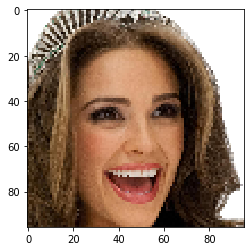

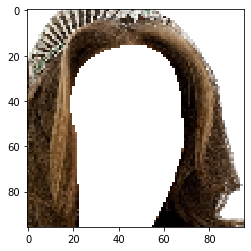

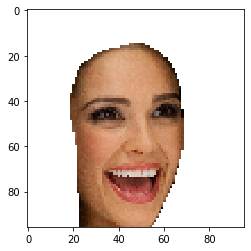

In [225]:
i = 0
plt.imshow(orig[i])
plt.show()
plt.imshow(hair[i])
plt.show()
plt.imshow(face[i])
plt.show()





In [226]:
np.savez('../data/px96.npz', only_face=face, only_hair=hair, both=orig)

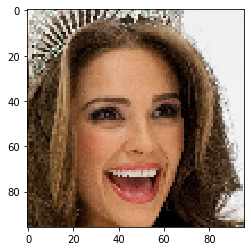

In [196]:
orig = image_file_names[0]
file_idx = orig.split(".")[0]
file_idx = int(file_idx)

test_orig = PIL.Image.open(f"{orig_path}/{orig}", mode='r').resize((96,96))
test_orig = np.array(test_orig)
plt.imshow(test_orig)

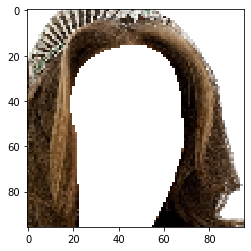

In [197]:
test_hair = PIL.Image.open(f"{mask_path}/{file_to_folder[file_idx]}/{file_idx:05}_{hair_postfix}.png", mode='r').resize((96,96))
test_hair_mask = np.array(test_hair)
test_orig[test_hair_mask==0] = 255
plt.imshow(test_orig)

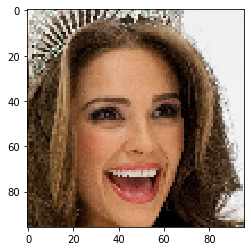

In [198]:
test_orig = PIL.Image.open(f"{orig_path}/{orig}", mode='r').resize((96,96))
test_orig = np.array(test_orig)
plt.imshow(test_orig)

In [199]:
face_masks = []
for postfix in other_postfix:
    if os.path.isfile(f"{mask_path}/{file_to_folder[file_idx]}/{file_idx:05}_{postfix}.png") :
        mask = PIL.Image.open(f"{mask_path}/{file_to_folder[file_idx]}/{file_idx:05}_{postfix}.png", mode='r').resize((96,96))
        face_masks.append(np.array(mask))


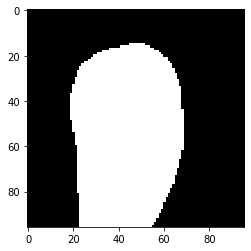

In [200]:
final_mask = np.zeros(test_orig.shape)
for mask in face_masks:
    final_mask = np.logical_or(final_mask,mask)
    
plt.imshow(final_mask.astype(np.uint8)*255)

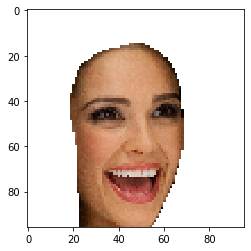

In [201]:
test_orig[final_mask==0] = 255
plt.imshow(test_orig)